In [25]:
import strax
import straxen
st_online = straxen.contexts.xenonnt_online()

## Look at what has being used in xenonnt_online

In [11]:
st_online.config

{'n_tpc_pmts': 494,
 'n_top_pmts': 253,
 'gain_model': ('to_pe_constant', '1300V_20200428'),
 'channel_map': immutabledict({'tpc': (0, 493), 'he': (500, 752), 'aqmon': (790, 807), 'tpc_blank': (999, 999), 'mv': (1000, 1083), 'mv_blank': (1999, 1999)})}

## Modify the gain model using the type option 'to_pe_constant'

In [12]:
st_online.set_config(dict(gain_model=('to_pe_constant',0.001)))


In [13]:
st_online.config

{'n_tpc_pmts': 494,
 'n_top_pmts': 253,
 'gain_model': ('to_pe_constant', 0.001),
 'channel_map': immutabledict({'tpc': (0, 493), 'he': (500, 752), 'aqmon': (790, 807), 'tpc_blank': (999, 999), 'mv': (1000, 1083), 'mv_blank': (1999, 1999)})}

## Modify the gain model creating a new context

In [19]:
st_online2 = st_online.new_context(config=dict(gain_model=('to_pe_constant',0.002)))
st_online2.config

{'n_tpc_pmts': 494,
 'n_top_pmts': 253,
 'gain_model': ('to_pe_constant', 0.002),
 'channel_map': immutabledict({'tpc': (0, 493), 'he': (500, 752), 'aqmon': (790, 807), 'tpc_blank': (999, 999), 'mv': (1000, 1083), 'mv_blank': (1999, 1999)})}

## Calculate peaks using this gain model ('to_pe_constant', 0.001)

In [15]:
peaks =st_online.get_array('007695','peaklets') 

Removing old incomplete data in ./strax_data/007695-lone_hits-edyksmugi5
Removing old incomplete data in ./strax_data/007695-peaklets-edyksmugi5


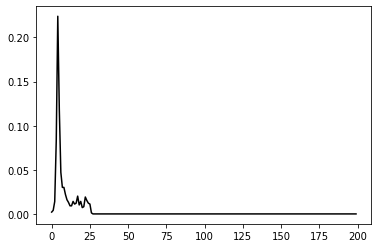

In [16]:
import matplotlib.pyplot as plt
plt.plot(peaks['data'][2],'k')

## Compare the same peak with new gain model (it should be the double when plotting data)

In [20]:
peaks_v2=st_online2.get_array('007695','peaklets')

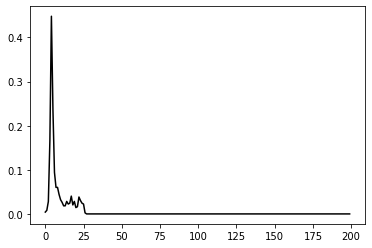

In [21]:
plt.plot(peaks_v2['data'][2],'k')

## We can print out what gains values the plugin is using 
* the gains were included by $: st_online2 = st_online.new_context(config=dict(gain_model=('to_pe_constant',0.002))) 

In [23]:
my_gains = st_online2.get_single_plugin('007695', 'peaklets').to_pe
print(my_gains)

[0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.

## Look at XENONnT context

In [26]:
import straxen 
st_1t = straxen.contexts.xenon1t_dali()

In [27]:
st_1t.config


{'check_raw_record_overlaps': False,
 'allow_sloppy_chunking': True,
 'n_tpc_pmts': 248,
 'n_top_pmts': 127,
 'channel_map': immutabledict({'tpc': (0, 247), 'diagnostic': (248, 253), 'aqmon': (254, 999)}),
 'hev_gain_model': ('to_pe_per_run',
  'https://raw.githubusercontent.com/XENONnT/strax_auxiliary_files/master/to_pe.npy'),
 'gain_model': ('to_pe_per_run',
  'https://raw.githubusercontent.com/XENONnT/strax_auxiliary_files/master/to_pe.npy'),
 'pmt_pulse_filter': (0.012,
  -0.119,
  2.435,
  -1.271,
  0.357,
  -0.174,
  -0.0,
  -0.036,
  -0.028,
  -0.019,
  -0.025,
  -0.013,
  -0.03,
  -0.039,
  -0.005,
  -0.019,
  -0.012,
  -0.015,
  -0.029,
  0.024,
  -0.007,
  0.007,
  -0.001,
  0.005,
  -0.002,
  0.004,
  -0.002),
 'tail_veto_threshold': 100000,
 'peak_right_extension': 30,
 'peak_min_pmts': 2,
 'save_outside_hits': (3, 3),
 'hit_min_amplitude': 'XENON1T_SR1'}

In [30]:
st_1t.show_config('records')

,option,default,current,applies_to,help
0,hev_gain_model,"(disabled, None)","(to_pe_per_run, https://raw.githubusercontent....","(records, veto_regions, pulse_counts)",PMT gain model used in the software high-energ...
1,baseline_samples,40,<OMITTED>,"(records, veto_regions, pulse_counts)",Number of samples to use at the start of the p...
2,tail_veto_threshold,0,100000,"(records, veto_regions, pulse_counts)",Minimum peakarea in PE to trigger tail veto.Se...
3,tail_veto_duration,3000000,<OMITTED>,"(records, veto_regions, pulse_counts)",Time in ns to veto after large peaks
4,tail_veto_resolution,1000,<OMITTED>,"(records, veto_regions, pulse_counts)",Time resolution in ns for pass-veto waveform s...
5,tail_veto_pass_fraction,0.05,<OMITTED>,"(records, veto_regions, pulse_counts)",Pass veto if maximum amplitude above max * fra...
6,tail_veto_pass_extend,3,<OMITTED>,"(records, veto_regions, pulse_counts)",Extend pass veto by this many samples (tail_ve...
7,pmt_pulse_filter,None,"(0.012, -0.119, 2.435, -1.271, 0.357, -0.174, ...","(records, veto_regions, pulse_counts)","Linear filter to apply to pulses, will be norm..."
8,save_outside_hits,"(3, 20)","(3, 3)","(records, veto_regions, pulse_counts)","Save (left, right) samples besides hits; cut t..."
9,n_tpc_pmts,<OMITTED>,248,"(records, veto_regions, pulse_counts)",Number of TPC PMTs


In [37]:
gains_1t_r =st_1t.get_single_plugin('170206_0116', 'records').to_pe
print(gains_1t_r)


[0.00701536 0.         0.         0.00810555 0.00438278 0.00788193
 0.00358062 0.00751123 0.00743156 0.00483184 0.00707198 0.00565721
 0.         0.00555947 0.00795876 0.00703689 0.00640406 0.00808125
 0.00714394 0.00743571 0.00715155 0.00763603 0.00396764 0.00726181
 0.00540837 0.00739989 0.         0.         0.00715719 0.00727335
 0.00422554 0.00762081 0.00413517 0.00704631 0.         0.00536619
 0.00742343 0.00703481 0.00454276 0.00518346 0.00701237 0.00543362
 0.00459376 0.00733841 0.0061342  0.00651856 0.00758981 0.00475848
 0.00747936 0.00757543 0.00458526 0.00460747 0.007139   0.00801151
 0.00470327 0.008673   0.00374404 0.00497367 0.01036212 0.00754385
 0.00602822 0.0083966  0.         0.00449683 0.00483235 0.
 0.00767005 0.00722639 0.00356084 0.00565691 0.00455742 0.00788018
 0.00774414 0.         0.00357772 0.00368471 0.00587437 0.00513111
 0.00932719 0.         0.00508439 0.00409454 0.00386858 0.00816855
 0.00673827 0.0080892  0.         0.00693313 0.         0.00651581
 0.

In [38]:
gains_1t_p =st_1t.get_single_plugin('170206_0116', 'peaklets').to_pe
print(gains_1t_p)

[0.00701536 0.         0.         0.00810555 0.00438278 0.00788193
 0.00358062 0.00751123 0.00743156 0.00483184 0.00707198 0.00565721
 0.         0.00555947 0.00795876 0.00703689 0.00640406 0.00808125
 0.00714394 0.00743571 0.00715155 0.00763603 0.00396764 0.00726181
 0.00540837 0.00739989 0.         0.         0.00715719 0.00727335
 0.00422554 0.00762081 0.00413517 0.00704631 0.         0.00536619
 0.00742343 0.00703481 0.00454276 0.00518346 0.00701237 0.00543362
 0.00459376 0.00733841 0.0061342  0.00651856 0.00758981 0.00475848
 0.00747936 0.00757543 0.00458526 0.00460747 0.007139   0.00801151
 0.00470327 0.008673   0.00374404 0.00497367 0.01036212 0.00754385
 0.00602822 0.0083966  0.         0.00449683 0.00483235 0.
 0.00767005 0.00722639 0.00356084 0.00565691 0.00455742 0.00788018
 0.00774414 0.         0.00357772 0.00368471 0.00587437 0.00513111
 0.00932719 0.         0.00508439 0.00409454 0.00386858 0.00816855
 0.00673827 0.0080892  0.         0.00693313 0.         0.00651581
 0.

In [40]:
gains_comparison = gains_1t_r == gains_1t_p
equal_gais = gains_comparison.all()
print('records and peaklets use same gains? ',equal_gais)

records and peaklets use same gains?  True


In [41]:
import straxen as st
st = straxen.contexts.xenon1t_dali()

In [42]:
st.config

{'check_raw_record_overlaps': False,
 'allow_sloppy_chunking': True,
 'n_tpc_pmts': 248,
 'n_top_pmts': 127,
 'channel_map': immutabledict({'tpc': (0, 247), 'diagnostic': (248, 253), 'aqmon': (254, 999)}),
 'hev_gain_model': ('to_pe_per_run',
  'https://raw.githubusercontent.com/XENONnT/strax_auxiliary_files/master/to_pe.npy'),
 'gain_model': ('to_pe_per_run',
  'https://raw.githubusercontent.com/XENONnT/strax_auxiliary_files/master/to_pe.npy'),
 'pmt_pulse_filter': (0.012,
  -0.119,
  2.435,
  -1.271,
  0.357,
  -0.174,
  -0.0,
  -0.036,
  -0.028,
  -0.019,
  -0.025,
  -0.013,
  -0.03,
  -0.039,
  -0.005,
  -0.019,
  -0.012,
  -0.015,
  -0.029,
  0.024,
  -0.007,
  0.007,
  -0.001,
  0.005,
  -0.002,
  0.004,
  -0.002),
 'tail_veto_threshold': 100000,
 'peak_right_extension': 30,
 'peak_min_pmts': 2,
 'save_outside_hits': (3, 3),
 'hit_min_amplitude': 'XENON1T_SR1'}

In [43]:
st.set_config(dict(gain_model=('to_pe_constant',0.001),s1_min_channels=50))


In [44]:
st.config

{'check_raw_record_overlaps': False,
 'allow_sloppy_chunking': True,
 'n_tpc_pmts': 248,
 'n_top_pmts': 127,
 'channel_map': immutabledict({'tpc': (0, 247), 'diagnostic': (248, 253), 'aqmon': (254, 999)}),
 'hev_gain_model': ('to_pe_per_run',
  'https://raw.githubusercontent.com/XENONnT/strax_auxiliary_files/master/to_pe.npy'),
 'gain_model': ('to_pe_constant', 0.001),
 'pmt_pulse_filter': (0.012,
  -0.119,
  2.435,
  -1.271,
  0.357,
  -0.174,
  -0.0,
  -0.036,
  -0.028,
  -0.019,
  -0.025,
  -0.013,
  -0.03,
  -0.039,
  -0.005,
  -0.019,
  -0.012,
  -0.015,
  -0.029,
  0.024,
  -0.007,
  0.007,
  -0.001,
  0.005,
  -0.002,
  0.004,
  -0.002),
 'tail_veto_threshold': 100000,
 'peak_right_extension': 30,
 'peak_min_pmts': 2,
 'save_outside_hits': (3, 3),
 'hit_min_amplitude': 'XENON1T_SR1',
 's1_min_channels': 50}